# Photoelectric effect

Where are we at the beginning of the 20$^{th}$ century?
<ul>
    <li>We know electrons are bound to matter ("plum pudding" model will make an appearance in the next chapter)</li>
    <li>We know that in metals, the valence electrons move easily within the material</li>
    <li>However, it's not easy to make electrons leave the surface of the metal. Doing so requires significant energy input.</li>
</ul>

We know now that electrons can be ejected from a metal substrate the following ways:
<ul>
    <li>Thermionic emission: heat up the metal so that the electrons have enough energy of random motion to exceed the atom's binding energy (we already alluded to this one)</li>
    <li>Secondary emission: a high-speed particle impacting the metal knocks an electron off the surface</li>
    <li>Field emission: put the metal in a strong enough electric field so that the $F_f = qE$ exceeds the mutual attraction between an electron and its atom's nucleus</li>
    <li><bf>Photoelectric effect:</bf> energetic light shining on the metal knocks electrons loose</li>
</ul>

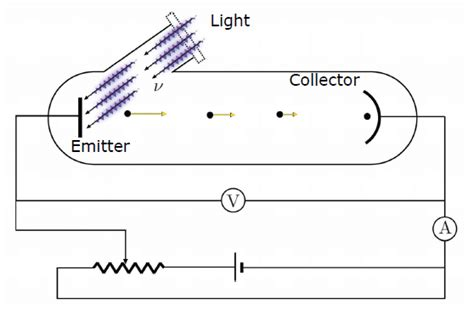

In [1]:
from IPython.display import display, Image

display(Image(filename="photoelectric_effect.jpeg"))

#### Important features of experimental setup:

<ul>
    <li>Light intensity $\mathcal{I}$ is either measured or controlled</li>
    <li>Ammeter (A) measures current</li>
    <li>Applied voltage (V) is reversible</li>
</ul>


#### Experimental results:

<ol>
    <li>The photoelectrons' kinetic energies are independent of the light <bf>intensity</bf> (typical units W/m$^2$.)</li>
</ol>

<ol start=2>
    <li>The maximum kinetic energy of the photoelectrons (for a particular emitting material) depends <bf>only</bf> on the frequency of the incident light, not the intensity.</li>
</ol>

We measure the maximum kinetic energy of the photoelectrons by figuring out what voltage -$V_0$ it takes to stop the most energetic photoelectrons.

<ol start=3>
    <li>The smaller the <bf>work function</bf> $\phi$ of the emitting material, the smaller the threshold frequency of light that can eject photoelectrons. For example, you may need UV to eject photoelectrons from one material while visible light will work for another. (No example plot, since you are exploring this on your homework. See your textbook.)</li>
    <li>The <em>number</em> of photoelectrons produced is proportional to the <em>intensity</em> of the incident light, not the frequency.</li>
</ol>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Make readable plots
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", "font.sans-serif":"Arial"})

def erf(x):
    # save the sign of x
    sign = 1 if x >= 0 else -1
    x = abs(x)

    # constants
    a1 =  0.254829592
    a2 = -0.284496736
    a3 =  1.421413741
    a4 = -1.453152027
    a5 =  1.061405429
    p  =  0.3275911

    # A&S formula 7.1.26
    t = 1.0/(1.0 + p*x)
    y = 1.0 - (((((a5*t + a4)*t) + a3)*t + a2)*t + a1)*t*np.exp(-x*x)
    return sign*y

# erf function is from https://stackoverflow.com/questions/457408/is-there-an-easily-available-implementation-of-erf-for-python

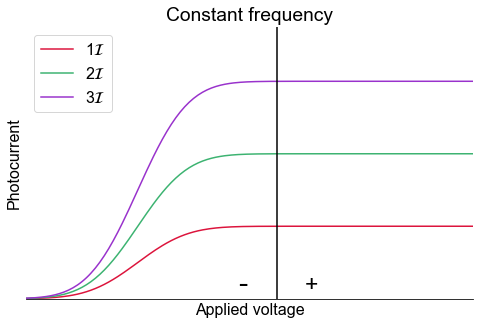

In [3]:
Nx = 201
x = np.linspace(0, 8, num=Nx, endpoint=True)
colors = ['mediumblue', 'crimson', 'mediumseagreen', 'darkorchid']
fig, ax = plt.subplots(1, 1, figsize=(8,5))

for i in range(1,4):
    ax.plot(x, [i*erf(x[j]-2)+i for j in range(Nx)], color=colors[i], label=f"{i}" + r"$\mathcal{I}$")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0, 8])
ax.set_ylim([0, 7.5])
ax.axvline(4.5, color='k')
ax.set_xlabel('Applied voltage')
ax.set_ylabel('Photocurrent')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(5, 0.2, '+', fontsize='x-large')
ax.text(3.8, 0.2, '-', fontsize='xx-large')
ax.set_title('Constant frequency')
ax.legend(loc='best')

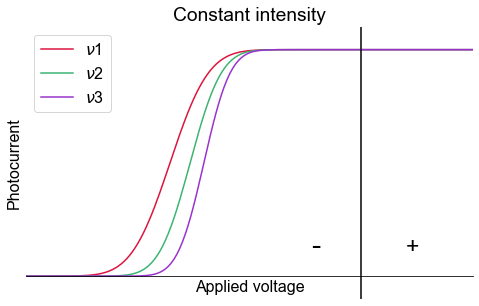

In [4]:
x2 = np.linspace(-2, 8, num=Nx, endpoint=True)
fig, ax = plt.subplots(1, 1, figsize=(8,5))

for i in range(1,4):
    ax.plot(x2, [erf((1+i*0.3)*x2[j]-0.75*i)+1 for j in range(Nx)], color=colors[i], label=r"$\nu$"+f"{i}")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-2, 6])
ax.set_ylim([-0.2, 2.2])
ax.set_xlabel('Applied voltage')
ax.set_ylabel('Photocurrent')
ax.axvline(4, color='k')
ax.set_xlabel('Applied voltage')
ax.set_ylabel('Photocurrent')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(4.8, 0.2, '+', fontsize='x-large')
ax.text(3.1, 0.2, '-', fontsize='xx-large')
ax.set_title('Constant intensity')
ax.legend(loc='upper left')